# Ejercicios Sesión 3, Parte 2

Acá estudiaremos la data pandémica del Minsal para construir un informe que analice la pandemia en Chile. Claramente, no redactamos el Word, sino que nos dedicaremos a calcular lo necesario usando Python.

<p>
<font size='1'>Material creado por &copy; 2024 José Tomás Marquinez, todos los derechos reservados. Data disponible originalmente en el <a href="https://github.com/MinCiencia">Github del Ministerio de Ciencias de Chile</a> (lo sacaron), pero ahora extraída desde <a href="https://www.kaggle.com/datasets/dataobservatory/datoscovid19chile">Kaggle</a> (Productos 6, 9, y 91)</font>
<br>

## Análisis Pandémico - COVID-19 en Chile

En la carpeta `data` les dejé tres archivos que les puede interesar. A continuación se los detallo:

- `data_covid_confirmados_cl.xlsx` (Adaptado del Producto 6): Da cuenta de los casos confirmados **acumulados** en cada una de las comunas de Chile, según residencia, conforme a los informes epidemiológicos publicados por el Ministerio de Salud del país. Contiene las columnas:
    - `Fecha`
    - `Region`: Nombre de la región
    - `Region ID`: Número de la región
    - `Comuna`: Nombre de la comuna
    - `Comuna ID`: Número de la comuna
    - `Casos Confirmados`: casos confirmados **acumulados** a la fecha,
    - `Poblacion`: cantidad de habitantes de la comuna, 


- `data_covid_en_uci_por_rango_etario_cl.csv` (Producto 9): Da cuenta del número de pacientes **actualmente** en UCI por grupos etarios (<=39; 40-49; 50-59; 60-69; y >=70) y que son casos confirmados por COVID-19, reportados diariamente por el Ministerio de Salud, desde el 01-04-2020. El archivo contiene la columna:
    - `Grupo de edad`: Rango etario
    - Columnas `[Fecha]`: Estas últimas columnas indican el número de pacientes ocupando cama UCI por grupo etario, desde el 01-04-2020 hasta la fecha.

- `data_covid_ingresos_mm_uci_cl.csv`: (Producto 91): Media móvil de los últimos 7 días de **ingresos** a UCI por covid en el sistema integrado de salud, público-privado.
    - `Serie`: Nombre de la serie
    - Columnas `[Fecha]`: Estas últimas columnas indican la media móvil de 7 días del número de ingresos a UCI. Por ejemplo, que el 16 de abril del 2020 indique 27.71 pacientes, significa que en promedio ingresaron 27.71 pacientes diarios a nivel nacional en la semana que termina en el 16 de abril.

Primero, trabajemos con el archivo sobre confirmados. Note que es un archivo Excel. Léalo y cárguelo en su _notebook_ en un _DataFrame_:

In [13]:
import pandas as pd

df_confirmados = pd.read_excel('data/data_covid_confirmados_cl.xlsx')

Analice un poco el contenido del archivo. Por ejemplo, vea cuántas filas y columnas tiene, y muestre las primeras 10 filas. Además, vea los tipos de datos de las columnas. 

In [14]:
print(df_confirmados.shape)
display(df_confirmados.head(10))
df_confirmados.dtypes

(104618, 7)


,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
0,2021-01-01,Arica y Parinacota,15,Arica,15101.0,247552.0,11212.0
1,2021-01-01,Arica y Parinacota,15,Camarones,15102.0,1233.0,27.0
2,2021-01-01,Arica y Parinacota,15,General Lagos,15202.0,810.0,64.0
3,2021-01-01,Arica y Parinacota,15,Putre,15201.0,2515.0,73.0
4,2021-01-01,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,44.0
5,2021-01-01,Tarapacá,1,Alto Hospicio,1107.0,129999.0,5423.0
6,2021-01-01,Tarapacá,1,Camina,1402.0,1375.0,90.0
7,2021-01-01,Tarapacá,1,Colchane,1403.0,1583.0,114.0
8,2021-01-01,Tarapacá,1,Huara,1404.0,3000.0,219.0
9,2021-01-01,Tarapacá,1,Iquique,1101.0,223463.0,10103.0


Fecha                 object
Region                object
Region ID              int64
Comuna                object
Comuna ID            float64
Poblacion            float64
Casos Confirmados    float64
dtype: object

Notará que la columna `Fecha` se leyó como _str_ (`object`). Convirtámoslo a fecha. Para ello, una _Serie_ (una columna) puede ser convertida a fecha utilizando la función `to_datetime()` de `Pandas`, que recibe como parámetro la columna a ser convertida, y la retorna convertida (por ende, podemos asignársela a la misma columna de vuelta)

```Python
df['col'] = pd.to_datetime(df['col'])
```
Incluso se le puede ayudar un poco con el formato en caso de ser necesario:

```Python
df['col'] = pd.to_datetime(df['col'], format="%Y/%m/%d")
```

Hágalo con la columna `Fecha` y luego verifique que quedó con el tipo de dato correcto.

In [15]:
df_confirmados.Fecha = pd.to_datetime(df_confirmados.Fecha)
df_confirmados.dtypes

Fecha                datetime64[ns]
Region                       object
Region ID                     int64
Comuna                       object
Comuna ID                   float64
Poblacion                   float64
Casos Confirmados           float64
dtype: object

Buscamos analizar su comuna de residencia. Para ello, primero veamos cuántas regiones existen en Chile, y quizás (sólo quizás) nos demos cuenta que la forma de escribir estas comunas pueden variar a su notación común (nombre más corto, escrito distinto, etc). Por lo mismo (y para ilustrar esto más aún), enliste a continuación cuáles son todos los valores únicos existentes bajo la columna **`Region`** para ver cómo están escritos los nombres de las regiones.

In [16]:
df_confirmados.Region.unique()

array(['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule',
       'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén',
       'Magallanes'], dtype=object)

Es posible notar que la Región del Libertador Bernardo O'Higgins en la base aparece sólamente como O'Higgins, además de que el nombre lo tiene escrito con un caracter apóstrofe distinto a `"'"`. Eso no era trivial de reconocer sin antes explorar.

Copie el texto asociado a su región de residencia, y filtre el dataset para su región en particular. No sobreescriba el dataframe original, pues lo usaremos más adelante.

In [17]:
df_confirmados_region = df_confirmados[df_confirmados.Region == 'Antofagasta']
df_confirmados_region

,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
13,2021-01-01,Antofagasta,2,Antofagasta,2101.0,425725.0,14225.0
14,2021-01-01,Antofagasta,2,Calama,2201.0,190336.0,8095.0
15,2021-01-01,Antofagasta,2,Maria Elena,2302.0,6814.0,378.0
16,2021-01-01,Antofagasta,2,Mejillones,2102.0,14776.0,806.0
17,2021-01-01,Antofagasta,2,Ollague,2202.0,287.0,28.0
...,...,...,...,...,...,...,...
104274,2022-10-31,Antofagasta,2,San Pedro de Atacama,2203.0,10434.0,3026.0
104275,2022-10-31,Antofagasta,2,Sierra Gorda,2103.0,1746.0,459.0
104276,2022-10-31,Antofagasta,2,Taltal,2104.0,13657.0,3222.0
104277,2022-10-31,Antofagasta,2,Tocopilla,2301.0,28079.0,6178.0


Ahora, para esa región, enliste todas las comunas para ver cómo se encuentra escrita su comuna de residencia en la base (por ejemplo, no podemos saber a priori si La Higuera se encuentra escrita como "Higuera" o como "La Higuera"; lo mismo con "Olmue" vs "Olmué", o "O'Higgins" vs "OHiggins"), y luego cree un _dataframe_ sólo con la información asociada a su comuna.

In [18]:
df_confirmados_region.Comuna.unique()

array(['Antofagasta', 'Calama', 'Maria Elena', 'Mejillones', 'Ollague',
       'San Pedro de Atacama', 'Sierra Gorda', 'Taltal', 'Tocopilla',
       'Desconocido Antofagasta'], dtype=object)

In [19]:
df_confirmados_comuna = df_confirmados[df_confirmados.Comuna == 'Antofagasta']
df_confirmados_comuna

,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
13,2021-01-01,Antofagasta,2,Antofagasta,2101.0,425725.0,14225.0
375,2021-02-01,Antofagasta,2,Antofagasta,2101.0,425725.0,20488.0
737,2021-03-01,Antofagasta,2,Antofagasta,2101.0,425725.0,25171.0
1099,2020-04-01,Antofagasta,2,Antofagasta,2101.0,425725.0,32.0
1461,2022-04-01,Antofagasta,2,Antofagasta,2101.0,425725.0,77305.0
...,...,...,...,...,...,...,...
102821,2022-08-29,Antofagasta,2,Antofagasta,2101.0,425725.0,102820.0
103183,2022-05-30,Antofagasta,2,Antofagasta,2101.0,425725.0,80229.0
103545,2022-12-30,Antofagasta,2,Antofagasta,2101.0,425725.0,112569.0
103907,2022-01-31,Antofagasta,2,Antofagasta,2101.0,425725.0,59311.0


Al ver los valores de las comunas, descubrimos un "Desconocido Región". Eso es porque hay confirmados que vinieron sin residencia clara o especificada.

Ahí, ya es posible observar, por ejemplo, que todas las columnas salvo la de casos confirmados y la de la fecha tienen los mismos valores para todas las filas dada una única comuna. También podemos notar que la columna `Fecha` no necesariamente está ordenada. Ordene el dataframe de la comuna para que quede ordenado temporalmente.

In [20]:
df_confirmados_comuna = df_confirmados_comuna.sort_values('Fecha')
df_confirmados_comuna

,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
69155,2020-03-30,Antofagasta,2,Antofagasta,2101.0,425725.0,29.0
1099,2020-04-01,Antofagasta,2,Antofagasta,2101.0,425725.0,32.0
7615,2020-04-03,Antofagasta,2,Antofagasta,2101.0,425725.0,44.0
18475,2020-04-06,Antofagasta,2,Antofagasta,2101.0,425725.0,54.0
25353,2020-04-08,Antofagasta,2,Antofagasta,2101.0,425725.0,60.0
...,...,...,...,...,...,...,...
95219,2022-12-23,Antofagasta,2,Antofagasta,2101.0,425725.0,111392.0
99201,2022-12-26,Antofagasta,2,Antofagasta,2101.0,425725.0,111766.0
103545,2022-12-30,Antofagasta,2,Antofagasta,2101.0,425725.0,112569.0
14131,2023-01-05,Antofagasta,2,Antofagasta,2101.0,425725.0,113108.0


Entendiendo que la columna `Casos Confirmados` indica la cantidad de casos acumulados en el tiempo para cada fecha, determine la cantidad final de confirmados (según esta base de datos) para la comuna. Notemos que como el valor siempre crece, basta con calcularle el máximo.

In [21]:
df_confirmados_comuna['Casos Confirmados'].max()

113363.0

Volvamos al _DataFrame_ original. ¿Podemos analizar cuántas comunas hay por región? Puedes usar la función agregadora `nunique()` que indica cuántos valores únicos hay por grupo. Luego, ordena el resultado de mayor cantidad de comunas a menor cantidad de comunas.

In [22]:
df_confirmados.groupby('Region').Comuna.nunique().sort_values(ascending=False)

Region
Metropolitana         53
Valparaíso            39
Biobío                34
O’Higgins             34
Araucanía             33
Los Lagos             31
Maule                 31
Ñuble                 22
Coquimbo              16
Los Ríos              13
Magallanes            12
Aysén                 11
Antofagasta           10
Atacama               10
Tarapacá               8
Arica y Parinacota     5
Name: Comuna, dtype: int64

A nivel nacional, vea cuál es la comuna que terminó con la mayor cantidad de confirmados acumulados.

_Hint:_ Para filtrar las filas con fecha igual a un valor en particular, se puede generar un valor de fecha como `pd.to_datetime('2024-04-05')`, o bien también se puede calcular la fecha máxima.

¿Se la juegan con el mínimo (sin que sea una comuna con valor "Desconocido")?

_Hint 2:_ Para filtrar aquellas comunas vacías, recuerde el `.notnull()`, y note el valor de `Comuna ID` para las comunas 


In [23]:
df_confirmados.Fecha.max()

Timestamp('2023-01-09 00:00:00')

In [24]:
pd.to_datetime("2023-01-09")

Timestamp('2023-01-09 00:00:00')

In [25]:
print("Máximo", df_confirmados['Casos Confirmados'].max())
display(df_confirmados[df_confirmados['Casos Confirmados']==df_confirmados['Casos Confirmados'].max()])

minimo = df_confirmados[(df_confirmados.Fecha == df_confirmados.Fecha.max()) & (df_confirmados['Comuna ID'].notnull())]['Casos Confirmados'].min()
print("Mínimo", minimo)
display(df_confirmados[(df_confirmados.Fecha == df_confirmados.Fecha.max()) & (df_confirmados['Comuna ID'].notnull()) & (df_confirmados['Casos Confirmados']==minimo)])


Máximo 165038.0


,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
28361,2023-01-09,Metropolitana,13,Puente Alto,13201.0,645909.0,165038.0


Mínimo 50.0


,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
28593,2023-01-09,Magallanes,12,Rio Verde,12103.0,211.0,50.0


Aprovechando que ya enlistamos los nombres de las regiones más arriba, calculemos el total de confirmados acumulado final entre las 3 regiones con mayor _cantidad de **comunas**_, y compárela con la cantidad total de confirmados acumulados final entre el resto de las regiones. Para esto, considere que el método `isin()` puede recibir como parámetro una lista de valores (por ejemplo, una lista de _str_ de interés). Por ejemplo:

```Python
df[df['col'].isin(["a","b","c"])]
```

Esto retornará el dataframe resultante con todas las filas que, bajo la columna `col` tienen los valores `a`, `b`, o `c`.

In [26]:
df_regiones_de_interes = df_confirmados[df_confirmados.Region.isin(['Metropolitana','Valparaíso','Biobío'])]
df_otras = df_confirmados[~df_confirmados.Region.isin(['Metropolitana','Valparaíso','Biobío'])]

print(df_regiones_de_interes[df_regiones_de_interes['Fecha'] == pd.to_datetime("2023-01-09")]['Casos Confirmados'].sum())
print(df_otras[df_otras['Fecha'] == pd.to_datetime("2023-01-09")]['Casos Confirmados'].sum())

3129451.0
2293410.0


Vamos a agregar un poco la información. Para ello, consideremos sólo la última fecha. Cree un _DataFrame_ que considere sólo la última fecha. Deberían quedarles 362 filas.

In [28]:
df_ultima_fecha = df_confirmados[df_confirmados.Fecha == df_confirmados.Fecha.max()]
df_ultima_fecha

,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
28236,2023-01-09,Arica y Parinacota,15,Arica,15101.0,247552.0,83092.0
28237,2023-01-09,Arica y Parinacota,15,Camarones,15102.0,1233.0,216.0
28238,2023-01-09,Arica y Parinacota,15,General Lagos,15202.0,810.0,123.0
28239,2023-01-09,Arica y Parinacota,15,Putre,15201.0,2515.0,595.0
28240,2023-01-09,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,228.0
...,...,...,...,...,...,...,...
28593,2023-01-09,Magallanes,12,Rio Verde,12103.0,211.0,50.0
28594,2023-01-09,Magallanes,12,San Gregorio,12104.0,681.0,146.0
28595,2023-01-09,Magallanes,12,Timaukel,12303.0,282.0,55.0
28596,2023-01-09,Magallanes,12,Torres del Paine,12402.0,1021.0,120.0


¿Pero no eran 345 comunas las que tenía Chile? Contemos cuántas veces aparece cada comuna en la columna `Comuna` (`.value_counts()`) del dataframe resultante, pero asegúrese de no esconder los `nan` (`.value_counts(dropna=False)`).

In [29]:
df_ultima_fecha.Comuna.value_counts(dropna=False)

Arica                     1
Negrete                   1
Mulchen                   1
Lota                      1
Los Angeles               1
                         ..
Pedro Aguirre Cerda       1
Paine                     1
Padre Hurtado             1
Nunoa                     1
Desconocido Magallanes    1
Name: Comuna, Length: 362, dtype: int64

Ahí estaba el problema (ver la última fila). No podemos eliminar esos valores porque sí hay confirmados a esa fecha que no tienen comuna identificada. ¿Cuántos confirmados totales entre todas las comunas hubo al término de esta base?

In [30]:
df_ultima_fecha['Casos Confirmados'].sum()

5422861.0

¿Cuántos confirmados terminaron en la _comuna_ de `Santiago`? ¿Y en la comuna de `Panguipulli`?

In [31]:
display(df_ultima_fecha[df_ultima_fecha.Comuna == 'Santiago'])
display(df_ultima_fecha[df_ultima_fecha.Comuna == 'Panguipulli'])


,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
28372,2023-01-09,Metropolitana,13,Santiago,13101.0,503147.0,141401.0


,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados
28540,2023-01-09,Los Ríos,14,Panguipulli,14108.0,35991.0,14135.0


¿A cuál de las dos comunas pareciera que le fue "mejor"? La respuesta pareciera ser directa. Santiago tuvo casi 10 veces más confirmados que Panguipulli, pero fíjese también en sus poblaciones. Santiago es importantemente más grande en población que Panguipulli. En el mundo epidémico existe un valor que se conoce como _Tasa de incidencia_, que estandariza estos valores a la población local de cada región/comuna. La fórmula es la siguiente:

$ Tasa = \frac{Casos}{Población} \cdot 100.000 $

(También se puede calcular por 10.000; ahí depende de la gravedad de la pandemia). Si una tasa da 150, quiere decir que 150 de cada 100.000 personas (independiente de la población real de la comuna/región) se contagió. Calculemos la tasa para todas las comunas, creando una columna sobre el dataframe que tenemos sobre la última fecha.

In [32]:
df_ultima_fecha['tasa_incidencia'] = df_ultima_fecha['Casos Confirmados'] / df_ultima_fecha['Poblacion'] * 100000

C:\Users\jmarquinez\AppData\Local\Temp\ipykernel_25496\1741204448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ultima_fecha['tasa_incidencia'] = df_ultima_fecha['Casos Confirmados'] / df_ultima_fecha['Poblacion'] * 100000


(Puede que les haya aparecido un Warning... honestamente omítanlo) 

¿Cambió su respuesta sobre cuál entre esas dos comunas "le fue peor"?

In [33]:
display(df_ultima_fecha[df_ultima_fecha.Comuna == 'Santiago'])
display(df_ultima_fecha[df_ultima_fecha.Comuna == 'Panguipulli'])


,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados,tasa_incidencia
28372,2023-01-09,Metropolitana,13,Santiago,13101.0,503147.0,141401.0,28103.317718


,Fecha,Region,Region ID,Comuna,Comuna ID,Poblacion,Casos Confirmados,tasa_incidencia
28540,2023-01-09,Los Ríos,14,Panguipulli,14108.0,35991.0,14135.0,39273.707316


Hasta ahora todo este último análisis es sobre la última fecha registrada en la base. Vamos ahora a calcular la cantidad de confirmados diarios (serie de tiempo) a nivel nacional. Para eso, comencemos encontrando la cantidad de confirmados acumulados de forma diaria, es decir, necesitaremos agrupar totales a nivel `Fecha`. Luego de hacerlo, resetee los índices (`.reset_index()`) para convertirlo a _DataFrame_ y almacene el resultado en un nuevo _DataFrame_.

In [34]:
df_acumulado_total_por_fecha = df_confirmados.groupby('Fecha')['Casos Confirmados'].sum().reset_index()
df_acumulado_total_por_fecha

,Fecha,Casos Confirmados
0,2020-03-30,1937.0
1,2020-04-01,2817.0
2,2020-04-03,3515.0
3,2020-04-06,4586.0
4,2020-04-08,5294.0
...,...,...
284,2022-12-23,5355572.0
285,2022-12-26,5366587.0
286,2022-12-30,5391347.0
287,2023-01-05,5412134.0


A este nuevo _DataFrame_ agreguémosle una tercera columna indicando la cantidad de confirmados **nuevos** por día. Para ello, es posible usar el método `.diff()` sobre una _Serie_.

```Python
df['diferencia_entre_filas'] = df['valor_acumulado'].diff()
df['diferencia_entre_filas'] = df['diferencia_entre_filas'].fillna(0) # Como la primera fila quedará vacía, rellenamos las celdas vacías con 0s (o con el valor que queramos). 
```

In [35]:
df_acumulado_total_por_fecha['casos_nuevos'] = df_acumulado_total_por_fecha['Casos Confirmados'].diff()
df_acumulado_total_por_fecha.casos_nuevos = df_acumulado_total_por_fecha.casos_nuevos.fillna(1937)
df_acumulado_total_por_fecha

,Fecha,Casos Confirmados,casos_nuevos
0,2020-03-30,1937.0,1937.0
1,2020-04-01,2817.0,880.0
2,2020-04-03,3515.0,698.0
3,2020-04-06,4586.0,1071.0
4,2020-04-08,5294.0,708.0
...,...,...,...
284,2022-12-23,5355572.0,16049.0
285,2022-12-26,5366587.0,11015.0
286,2022-12-30,5391347.0,24760.0
287,2023-01-05,5412134.0,20787.0


Grafiquemos la curva pandémica. Grafique los casos nuevos diarios a nivel nacional. Puede que tenga que configurar los valores de parámetros para especificar qué valor quiere que sea su eje `x`, y qué valor quiere que se su eje `y`.

```Python
df.plot(x='col1',y='col2')
```

<Axes: xlabel='Fecha'>

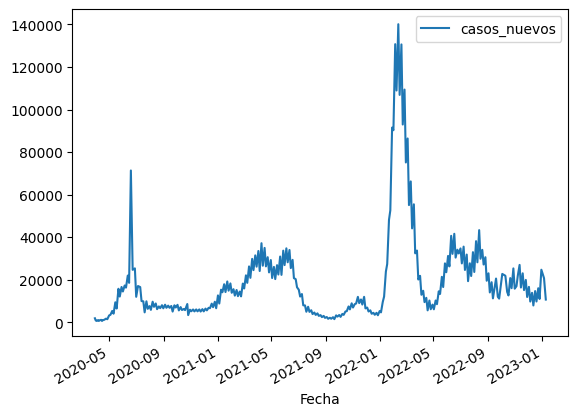

In [36]:
df_acumulado_total_por_fecha.plot(x='Fecha',y='casos_nuevos')

Uffff, no se ve como lo que mostraban en la tele. Muchos zigzageos. Esto se debe a que en el registro de datos existe una temporalidad periódica natural (los sábados y domingos se registran menos valores que los días de semana). Por eso, es que lo que hacen es suavizar la curva (o, en palabras técnicas, calcular la media móvil de 7 días). Para ello, necesitamos tener información sobre todos los días (y que no hayan días ausentes, como sí pasa en esta base). Para esto los ayudo un poco. Crearemos un _DataFrame_ con todos los días desde el 2020-03-30 hasta el 2023-01-09.

In [37]:
# Genero el rango de fechas
rango_fechas = pd.date_range(start='2020-03-30', end='2023-01-09', freq='D')
# Creo el DataFrame a partir del rango de fechas
df_fechas = pd.DataFrame(rango_fechas, columns=['Fecha'])
df_fechas

,Fecha
0,2020-03-30
1,2020-03-31
2,2020-04-01
3,2020-04-02
4,2020-04-03
...,...
1011,2023-01-05
1012,2023-01-06
1013,2023-01-07
1014,2023-01-08


Necesitamos _unir_ nuestro _DataFrame_ a este, en busca de rellenar este _DataFrame_ con las columnas presentes en el que estábamos trabajando. (_Hint:_ `merge` puede ser de utilidad, rellenando las fechas actualmente vacías con valores 0 para los casos nuevos).

In [38]:
df_fechas = df_fechas.merge(df_acumulado_total_por_fecha, on='Fecha', how='left').fillna(0)
df_fechas

,Fecha,Casos Confirmados,casos_nuevos
0,2020-03-30,1937.0,1937.0
1,2020-03-31,0.0,0.0
2,2020-04-01,2817.0,880.0
3,2020-04-02,0.0,0.0
4,2020-04-03,3515.0,698.0
...,...,...,...
1011,2023-01-05,5412134.0,20787.0
1012,2023-01-06,0.0,0.0
1013,2023-01-07,0.0,0.0
1014,2023-01-08,0.0,0.0


Aunque esas celdas vacías del dataset igual nos van a perjudicar, démosle con el cálculo de la media móvil.

Para ello, es posible usar el método `rolling()`, que puede recibir el parámetro `window` que indica el largo de la ventana móvil; mientras que el agregador `mean()` indica que estamos calculando la media para esa ventana:
```Python
df['media_movil_7d'] = df['col'].rolling(window=7).mean()
```

In [39]:
df_fechas['media_movil_7d'] = df_fechas['casos_nuevos'].rolling(window=7).mean()
df_fechas

,Fecha,Casos Confirmados,casos_nuevos,media_movil_7d
0,2020-03-30,1937.0,1937.0,NaN
1,2020-03-31,0.0,0.0,NaN
2,2020-04-01,2817.0,880.0,NaN
3,2020-04-02,0.0,0.0,NaN
4,2020-04-03,3515.0,698.0,NaN
...,...,...,...,...
1011,2023-01-05,5412134.0,20787.0,6506.714286
1012,2023-01-06,0.0,0.0,2969.571429
1013,2023-01-07,0.0,0.0,2969.571429
1014,2023-01-08,0.0,0.0,2969.571429


Grafiquemos ahora sí la media móvil:

<Axes: xlabel='Fecha'>

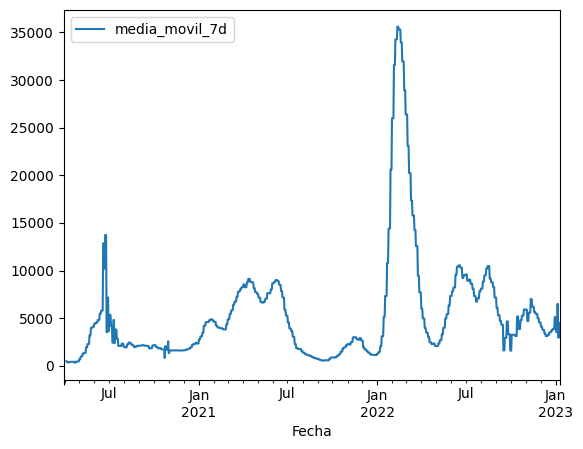

In [40]:
df_fechas.plot(x='Fecha',y='media_movil_7d')

¡Ahí se parece más!

Vamos con el segundo archivo sobre la media móvil de ingresos a UCI. Cárguelo:

In [41]:
df_uci = pd.read_csv('data/data_covid_ingresos_mm_uci_cl.csv')

Este es el formato real en el que se descargó el archivo, sin simplificaciones mías. Lo primero a notar es que tenemos el archivo más horizontal que vertical.

In [42]:
df_uci

,Serie,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,...,2023-08-21,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-26,2023-08-27,2023-08-28,2023-08-29,2023-08-30
0,Media Móvil Ingresos a UCI por COVID-19,27.857143,27.714286,26.142857,24,25.714286,26.142857,29.714286,31.428571,33.428571,...,0.571429,0.285714,0.428571,0.428571,0.428571,0.428571,0.428571,0.285714,0.428571,0.285714


Si lo que queremos es trasponer esto, se puede hacer fácilmente con el método `.transpose()` sobre el mismo _DataFrame_.

In [43]:
df_uci = df_uci.transpose()
df_uci

,0
Serie,Media Móvil Ingresos a UCI por COVID-19
2020-04-15,27.857143
2020-04-16,27.714286
2020-04-17,26.142857
2020-04-18,24
...,...
2023-08-26,0.428571
2023-08-27,0.428571
2023-08-28,0.285714
2023-08-29,0.428571


Si ve cómo quedó el resultado de esa trasposición, son requeridos un par de arreglos: resetear los índices para que se enumeren correctamente, darle nombre adecuado a los encabezados de columna, eliminar la primera fila, y convertir la fecha a _datetime_:

In [44]:
df_uci = df_uci.reset_index()
df_uci

,index,0
0,Serie,Media Móvil Ingresos a UCI por COVID-19
1,2020-04-15,27.857143
2,2020-04-16,27.714286
3,2020-04-17,26.142857
4,2020-04-18,24
...,...,...
1215,2023-08-26,0.428571
1216,2023-08-27,0.428571
1217,2023-08-28,0.285714
1218,2023-08-29,0.428571


In [45]:
df_uci = df_uci.rename(columns={'index':'Fecha', 0: 'media_movil_7d_uci'})
df_uci

,Fecha,media_movil_7d_uci
0,Serie,Media Móvil Ingresos a UCI por COVID-19
1,2020-04-15,27.857143
2,2020-04-16,27.714286
3,2020-04-17,26.142857
4,2020-04-18,24
...,...,...
1215,2023-08-26,0.428571
1216,2023-08-27,0.428571
1217,2023-08-28,0.285714
1218,2023-08-29,0.428571


In [46]:
df_uci = df_uci[1:]
df_uci

,Fecha,media_movil_7d_uci
1,2020-04-15,27.857143
2,2020-04-16,27.714286
3,2020-04-17,26.142857
4,2020-04-18,24
5,2020-04-19,25.714286
...,...,...
1215,2023-08-26,0.428571
1216,2023-08-27,0.428571
1217,2023-08-28,0.285714
1218,2023-08-29,0.428571


In [47]:
df_uci.Fecha = pd.to_datetime(df_uci.Fecha)
df_uci

C:\Users\jmarquinez\AppData\Local\Temp\ipykernel_25496\3114132099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uci.Fecha = pd.to_datetime(df_uci.Fecha)


,Fecha,media_movil_7d_uci
1,2020-04-15,27.857143
2,2020-04-16,27.714286
3,2020-04-17,26.142857
4,2020-04-18,24
5,2020-04-19,25.714286
...,...,...
1215,2023-08-26,0.428571
1216,2023-08-27,0.428571
1217,2023-08-28,0.285714
1218,2023-08-29,0.428571


Buscamos comparar a la par la cantidad promedio de ingresos a UCI con la cantidad promedio de casos confirmados **nuevos**. Para ello, necesitamos unir las dos tablas en base a la fecha. Traigamos esta información a nuestro _DataFrame_ con el que estábamos trabajando anteriormente (el que usamos para el último gráfico).

In [48]:
df_fechas = df_fechas.merge(df_uci, on='Fecha', how='left')
df_fechas

,Fecha,Casos Confirmados,casos_nuevos,media_movil_7d,media_movil_7d_uci
0,2020-03-30,1937.0,1937.0,NaN,NaN
1,2020-03-31,0.0,0.0,NaN,NaN
2,2020-04-01,2817.0,880.0,NaN,NaN
3,2020-04-02,0.0,0.0,NaN,NaN
4,2020-04-03,3515.0,698.0,NaN,NaN
...,...,...,...,...,...
1011,2023-01-05,5412134.0,20787.0,6506.714286,NaN
1012,2023-01-06,0.0,0.0,2969.571429,NaN
1013,2023-01-07,0.0,0.0,2969.571429,NaN
1014,2023-01-08,0.0,0.0,2969.571429,NaN


Después de eliminar todas las filas en que la media móvil está vacía en alguna de las dos columnas de medias móviles, calcule un nuevo indicador: la **tasa de hospitalización a UCI**, que indica cuál es el porcentaje de personas confirmadas que se hospitaliza en UCI. Para ello, tomaremos un supuesto fuerte que dice que los confirmados que se hospitalizan lo hacen inmediatamente después de confirmados (y no días después, como es la realidad).

In [49]:
df_fechas['tasa_hosp_uci'] = df_fechas['media_movil_7d_uci'] / df_fechas['media_movil_7d']
df_fechas

,Fecha,Casos Confirmados,casos_nuevos,media_movil_7d,media_movil_7d_uci,tasa_hosp_uci
0,2020-03-30,1937.0,1937.0,NaN,NaN,NaN
1,2020-03-31,0.0,0.0,NaN,NaN,NaN
2,2020-04-01,2817.0,880.0,NaN,NaN,NaN
3,2020-04-02,0.0,0.0,NaN,NaN,NaN
4,2020-04-03,3515.0,698.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1011,2023-01-05,5412134.0,20787.0,6506.714286,NaN,NaN
1012,2023-01-06,0.0,0.0,2969.571429,NaN,NaN
1013,2023-01-07,0.0,0.0,2969.571429,NaN,NaN
1014,2023-01-08,0.0,0.0,2969.571429,NaN,NaN


La campaña de vacunación comenzó para la población adulta el día 3 de febrero del 2021, ya superando al 50% de la población con dos dosis el día **20 de mayo del 2021**. Promedie la tasa de hospitalización antes del 20 de mayo del 2021, y después de esa fecha. ¿Qué puede concluir?

In [50]:
df_fechas[df_fechas.Fecha < pd.to_datetime('2021-05-20')].tasa_hosp_uci.mean()

0.02602777436354707

In [51]:
df_fechas[df_fechas.Fecha >= pd.to_datetime('2021-05-20')].tasa_hosp_uci.mean()

0.010495303122561358

Montemos el último archivo, de UCIs por rango etario.

In [52]:
df_uci_edades = pd.read_csv('data/data_covid_en_uci_por_rango_etario_cl.csv')

Pasó lo mismo que con el otro. Formateemos acorde (repetir pasos sobre el otro dataframe de UCI).

In [53]:
df_uci_edades

,Grupo de edad,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-26,2023-08-27,2023-08-28,2023-08-29,2023-08-30,2023-08-31
0,<=39,23,23,26,40,40,38,39,42,46,...,2,2,3,3,3,3,3,3,3,2
1,40-49,23,27,34,36,40,40,38,39,48,...,1,0,0,0,0,0,0,0,1,0
2,50-59,53,67,74,84,89,95,101,109,102,...,3,3,3,3,3,3,3,3,3,3
3,60-69,39,46,56,68,75,78,82,93,89,...,1,1,1,1,1,1,1,1,1,1
4,>=70,35,37,47,52,63,76,77,79,75,...,6,6,6,6,6,6,7,5,5,4


In [54]:
df_uci_edades = df_uci_edades.transpose()
df_uci_edades = df_uci_edades.reset_index()
df_uci_edades = df_uci_edades.rename(columns={'index':'Fecha', 0: '<=39', 1:'40-49', 2:'50-59', 3:'60-69', 4:'>=70'})
df_uci_edades = df_uci_edades[1:]
df_uci_edades

,Fecha,<=39,40-49,50-59,60-69,>=70
1,2020-04-01,23,23,53,39,35
2,2020-04-02,23,27,67,46,37
3,2020-04-03,26,34,74,56,47
4,2020-04-04,40,36,84,68,52
5,2020-04-05,40,40,89,75,63
...,...,...,...,...,...,...
1244,2023-08-27,3,0,3,1,6
1245,2023-08-28,3,0,3,1,7
1246,2023-08-29,3,0,3,1,5
1247,2023-08-30,3,1,3,1,5


Haga un gráfico de línea de la tabla anterior y maravíllese con la inteligencia de Python.

<Axes: xlabel='Fecha'>

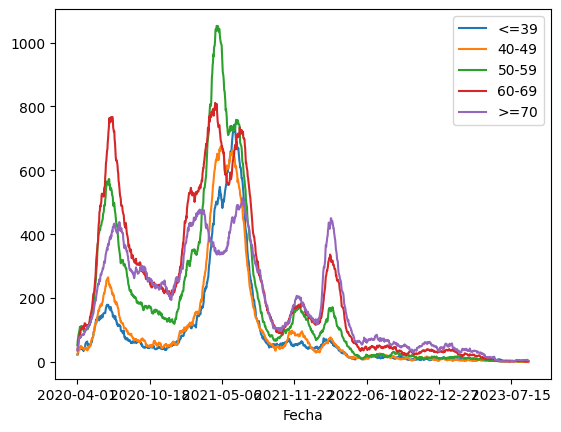

In [55]:
df_uci_edades.plot(x='Fecha')

Cree un DataFrame de sólo una columna con los nombres de todas las regiones. (`pd.DataFrame(resultado)`). Sugiero cambiarle el nombre a la columna.

In [23]:
df_nombres_regiones = pd.DataFrame(df_confirmados.Region.unique()).rename(columns={0:'Nombre_region'})
df_nombres_regiones

,Nombre_region
0,Arica y Parinacota
1,Tarapacá
2,Antofagasta
3,Atacama
4,Coquimbo
5,Valparaíso
6,Metropolitana
7,O’Higgins
8,Maule
9,Ñuble


A ese DataFrame, créele una columna adicional que calcule la cantidad de caracteres que tiene cada uno de esos nombres. (Sí, no es algo que sea muy necesario calcular, pero ayuda a ejercitar el `apply` y las funciones `lambda`).

In [24]:
df_nombres_regiones['cant_caracteres'] = df_nombres_regiones.Nombre_region.apply(lambda x: len(x))
df_nombres_regiones

,Nombre_region,cant_caracteres
0,Arica y Parinacota,18
1,Tarapacá,8
2,Antofagasta,11
3,Atacama,7
4,Coquimbo,8
5,Valparaíso,10
6,Metropolitana,13
7,O’Higgins,9
8,Maule,5
9,Ñuble,5
